In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from astropy import units as u

In [2]:
sol_to_earth = 332946.078
AU = 1.496e+13 #cm
M_sun = 1.989e+33 #g
G = 6.6743* 10**(-11) #N⋅m2/kg2

m_pl = 2.7932451e-8 * M_sun / 10**3 # kg, Mass of each planetesimal
m_emb = 2.7932451e-7 * M_sun / 10**3  # solMass, Mass of each planetary embryo
r_emb = 2.39e-5 * AU * 10**(-2) #m, radius of embryo
r_pl = 1.11e-5 * AU * 10**(-2) #m, radius of planetesimal
m_min = 0.5 * m_pl

In [3]:
r = 2 *AU*10**(-2)
v_rel = np.sqrt((G*M_sun/10**3)/r) #m/s
theta = np.pi/6
M_t = m_emb
M_p = m_pl
R_t = r_emb
R_p = r_pl
M_tot = M_t + M_p
R_tot = R_t + R_p
b = R_tot * np.sin(theta)
x_rel = R_tot * np.cos(theta)
v_esc = np.sqrt(2*G*M_tot/R_tot)
v_i = np.sqrt(v_rel**2 - 2*G*M_tot*(1/x_rel - 1/R_tot))

First step, compute vi/vesc and b/b_crit

In [4]:
print("v_i/v_esc = ", v_i/v_esc)
print("b/b_crit = ", b/R_t)

v_i/v_esc =  5.3219443841714975
b/b_crit =  0.7322175732217572


Now let's compute mass of largest remnant.

In [5]:
Cstar = 1.8
rho_1 = 1000
R_1 = (M_tot/(4/3*np.pi*rho_1))**(1/3)
mu = (M_t*M_p)/(M_tot)
gamma = M_p/M_t
l = R_tot*(1-np.sin(theta))
alpha = (3*R_p*l**2 - l**3)/(4*R_p**3)
mu_alpha = alpha*M_p*M_t/(M_t + alpha*M_p)
Q = (mu * v_i**2)/(2*M_tot)
Q_0 = 0.8 * Cstar * np.pi * rho_1 * G * R_1**2
Q_star = Q_0 * ((1+gamma)**2/(4*gamma)) * (mu/mu_alpha)**(3/2)

In [6]:
Q/Q_star

0.608818340519018

In [7]:
M_lr = 0.1 * M_tot * (Q/(1.8*Q_star))**(-3/2)
M_r = M_tot - M_lr
n_frag = M_r/m_min
print(n_frag)

10.815930736980095


In [12]:
#phi = theta
phi = np.linspace(0, np.pi/2, 1000)
c1 = 2.43
c2 = -0.0408
c3 = 1.86
c4 = 1.08
Gamma = ((1-gamma)/(1+gamma))**2
v_cr = v_esc * (  c1*Gamma*(1-np.sin(phi))**(5/2) + c2*Gamma + c3*Gamma*(1-np.sin(phi))**(5/2) + c4  )

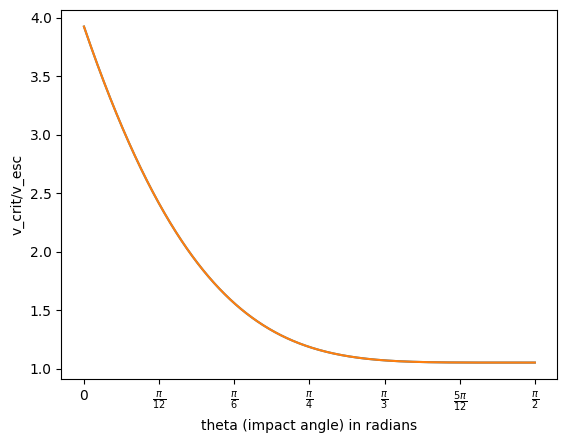

In [19]:
plt.plot(phi, v_cr/v_esc)

plt.xlabel('theta (impact angle) in radians')
plt.ylabel('v_crit/v_esc')

ticks = [0, np.pi/12, np.pi/6, np.pi/4, np.pi/3, np.pi/3+np.pi/12, np.pi/2]  # Desired tick positions
tick_labels = [r"$0$", r"$\frac{\pi}{12}$", r"$\frac{\pi}{6}$", r"$\frac{\pi}{4}$", r"$\frac{\pi}{3}$",r"$\frac{5\pi}{12}$", r"$\frac{\pi}{2}$"]  # Labels

plt.xticks(ticks, tick_labels)

plt.show()